# Kütüphaneler

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)


# Veri Seti

In [22]:
df = pd.read_csv("/Users/elif/Desktop/PHYTON PROGRAMLAMA/2_DERS_NOTLARI/Veriler/USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [23]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [26]:
df.describe([0.10,0.25,0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Murder,50.0,7.788,4.355510,0.8,2.56,4.075,7.25,11.250,13.32,16.763,17.4
Assault,50.0,170.760,83.337661,45.0,56.90,109.000,159.00,249.000,279.60,336.020,337.0
UrbanPop,50.0,65.540,14.474763,32.0,45.00,54.500,66.00,77.750,83.20,90.020,91.0
Rape,50.0,21.232,9.366385,7.3,10.67,15.075,20.10,26.175,32.40,45.265,46.0


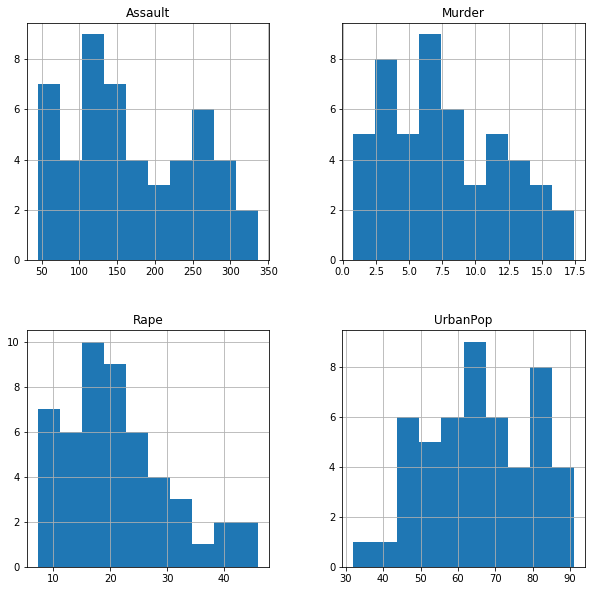

In [27]:
df.hist(figsize = (10,10));

In [28]:
kmeans = KMeans(n_clusters=4)

In [29]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
k_fit = kmeans.fit(df)

In [31]:
k_fit.n_clusters

4

In [32]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [33]:
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 0, 1,
       3, 1, 0, 2, 2, 1, 3, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 3, 0, 0, 2,
       3, 0, 0, 3, 3, 0])

# Kümelerin Görselleştirilmesi

In [24]:
k_means = KMeans(n_clusters = 2).fit(df)

In [25]:
kumeler = k_means.labels_

In [26]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

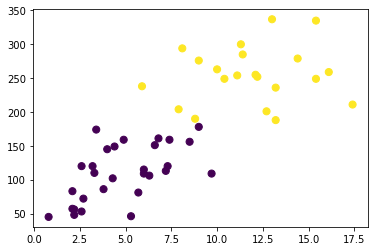

In [27]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");

In [28]:
merkezler = k_means.cluster_centers_

In [29]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

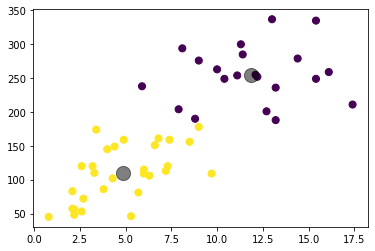

In [25]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5);

# Optimum Küme Sayısının Belirlenmesi

## Elbow Yöntemi

In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [31]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

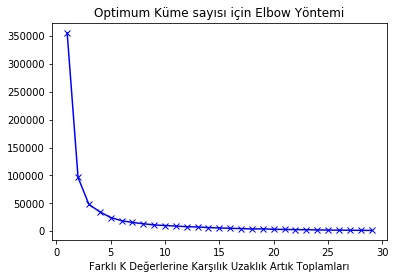

In [32]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [30]:
!pip install yellowbrick

In [34]:
from yellowbrick.cluster import KElbowVisualizer

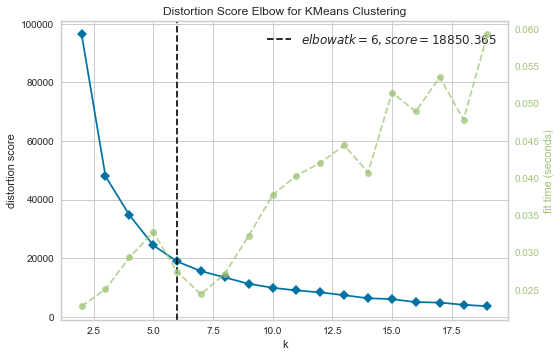

In [35]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof()

In [36]:
kmeans = KMeans(n_clusters = 6).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kumeler = kmeans.labels_

In [38]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,3
3,Arkansas,5
4,California,1
5,Colorado,5
6,Connecticut,4
7,Delaware,1
8,Florida,3
9,Georgia,5


In [39]:
df["KumeNo"] = kumeler

In [42]:
df[df["KumeNo"] == 4]

,Murder,Assault,UrbanPop,Rape,KumeNo
Connecticut,3.3,110,77,11.1,4
Idaho,2.6,120,54,14.2,4
Indiana,7.2,113,65,21.0,4
Kansas,6.0,115,66,18.0,4
Kentucky,9.7,109,52,16.3,4
Montana,6.0,109,53,16.4,4
Nebraska,4.3,102,62,16.5,4
Ohio,7.3,120,75,21.4,4
Pennsylvania,6.3,106,72,14.9,4
Utah,3.2,120,80,22.9,4


In [43]:
pwd

'/Users/mvahit/Desktop/DenetimsizOgrenme'

In [44]:
corona = pd.read_csv("train.csv")

In [46]:
corona.head(20)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0
5,6,NaN,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0
6,7,NaN,Afghanistan,33.0,65.0,2020-01-28,0.0,0.0
7,8,NaN,Afghanistan,33.0,65.0,2020-01-29,0.0,0.0
8,9,NaN,Afghanistan,33.0,65.0,2020-01-30,0.0,0.0
9,10,NaN,Afghanistan,33.0,65.0,2020-01-31,0.0,0.0


In [53]:
cdf = corona.groupby("Country/Region").agg({"ConfirmedCases":max,"Fatalities":max})

In [54]:
cdf.head()

,ConfirmedCases,Fatalities
Country/Region,,
Afghanistan,40.0,1.0
Albania,104.0,4.0
Algeria,230.0,17.0
Andorra,133.0,1.0
Antigua and Barbuda,3.0,0.0


In [80]:
cdf.shape

(163, 2)

In [57]:
pd.set_option('display.max_rows', None) #False 

In [60]:
from sklearn import preprocessing

In [66]:
scaler = preprocessing.MinMaxScaler().fit(cdf)
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
cdf_s = scaler.transform(cdf)

In [71]:
cdf_s[0:10]

array([[5.89970501e-04, 1.64554879e-04],
       [1.53392330e-03, 6.58219516e-04],
       [3.39233038e-03, 2.79743294e-03],
       [1.96165192e-03, 1.64554879e-04],
       [4.42477876e-05, 0.00000000e+00],
       [3.92330383e-03, 6.58219516e-04],
       [3.46607670e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [9.86725664e-03, 9.87329274e-04],
       [6.59882006e-02, 3.45565246e-03]])

In [78]:
cdf.head()

,ConfirmedCases,Fatalities
Country/Region,,
Afghanistan,40.0,1.0
Albania,104.0,4.0
Algeria,230.0,17.0
Andorra,133.0,1.0
Antigua and Barbuda,3.0,0.0


In [74]:
a = pd.DataFrame(cdf_s, columns = ["ConfirmedCases","Fatalities"])

In [119]:
a["Fatalities"].head()

0     0.001164555
1     0.001658220
2     0.003797433
3     0.001164555
4     0.001000000
5     0.001658220
6     0.001000000
7     0.001000000
8     0.001987329
9     0.004455652
10    0.001164555
11    0.001329110
12    0.001493665
13    0.001000000
14    0.001000000
15    0.015480829
16    0.001000000
17    0.001000000
18    0.001000000
19    0.001164555
20    0.006594866
21    0.001000000
22    0.001493665
23    0.001658220
24    0.001000000
25    0.001000000
26    0.003139213
27    0.001000000
28    0.001329110
29    0.519841534
30    0.001493665
31    0.001000000
32    0.001164555
33    0.001329110
34    0.001000000
35    0.001164555
36    0.002316439
37    0.001164555
38    0.001164555
39    0.001000000
40    0.004949317
41    0.001000000
42    0.001493665
43    0.003961988
44    0.004126543
45    0.001000000
46    0.001000000
47    0.001000000
48    0.001000000
49    0.001164555
50    0.142517196
51    0.001000000
52    0.001164555
53    0.001000000
54    0.001000000
55    0.02

In [82]:
cdf.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Turkey', 'US', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia'],
      dtype='object', name='Country/Region', length=163)

In [83]:
a["Country/Region"] = cdf.index

In [84]:
a.head()

,ConfirmedCases,Fatalities,Country/Region
0,0.000590,0.000165,Afghanistan
1,0.001534,0.000658,Albania
2,0.003392,0.002797,Algeria
3,0.001962,0.000165,Andorra
4,0.000044,0.000000,Antigua and Barbuda


In [88]:
a["Score"] = a["ConfirmedCases"]*a["Fatalities"]

In [89]:
a.head()

,ConfirmedCases,Fatalities,Country/Region,Score
0,0.001,0.000,Afghanistan,0.000
1,0.002,0.001,Albania,0.000
2,0.003,0.003,Algeria,0.000
3,0.002,0.000,Andorra,0.000
4,0.000,0.000,Antigua and Barbuda,0.000


In [117]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [92]:
a.sort_values("Score", ascending = False)

,ConfirmedCases,Fatalities,Country/Region,Score
75,0.942876106,1.000000000,Italy,0.942876106
29,1.000000000,0.518841534,China,0.518841534
139,0.518230088,0.380286325,Spain,0.197075816
71,0.339955752,0.298173441,Iran,0.101365776
50,0.293126844,0.141517196,France,0.041482489
55,0.428554572,0.020240250,Germany,0.008674052
154,0.308023599,0.025999671,US,0.008008512
157,0.098082596,0.055125884,United Kingdom,0.005406890
144,0.129719764,0.019746585,Switzerland,0.002561522
107,0.070044248,0.035050189,Netherlands,0.002455064


In [95]:
cdf.head()

,ConfirmedCases,Fatalities
Country/Region,,
Afghanistan,40.00,1.00
Albania,104.00,4.00
Algeria,230.00,17.00
Andorra,133.00,1.00
Antigua and Barbuda,3.00,0.00


In [99]:
kmeans = KMeans(n_clusters = 3).fit(cdf)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
kumeler = kmeans.labels_

In [101]:
kumeler

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [102]:
pd.DataFrame({"Eyaletler": cdf.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Aruba,0
8,Australia,0
9,Austria,0


In [103]:
cdf["KumeNo"] = kumeler

In [104]:
cdf.head()

,ConfirmedCases,Fatalities,KumeNo
Country/Region,,,
Afghanistan,40.00,1.00,0
Albania,104.00,4.00,0
Algeria,230.00,17.00,0
Andorra,133.00,1.00,0
Antigua and Barbuda,3.00,0.00,0


In [106]:
cdf.sort_values("ConfirmedCases", ascending = False).head(10)

,ConfirmedCases,Fatalities,KumeNo
Country/Region,,,
China,67800.00,3153.00,2
Italy,63927.00,6077.00,2
Spain,35136.00,2311.00,1
Germany,29056.00,123.00,1
Iran,23049.00,1812.00,1
US,20884.00,158.00,1
France,19874.00,860.00,1
"Korea, South",8961.00,111.00,0
Switzerland,8795.00,120.00,0


In [112]:
cdf[cdf["KumeNo"] >= 1]

,ConfirmedCases,Fatalities,KumeNo
Country/Region,,,
China,67800.00,3153.00,2
France,19874.00,860.00,1
Germany,29056.00,123.00,1
Iran,23049.00,1812.00,1
Italy,63927.00,6077.00,2
Spain,35136.00,2311.00,1
US,20884.00,158.00,1


In [118]:
a.sort_values("Score", ascending = False).head(10)

,ConfirmedCases,Fatalities,Country/Region,Score
75,0.942876106,1.000000000,Italy,0.942876106
29,1.000000000,0.518841534,China,0.518841534
139,0.518230088,0.380286325,Spain,0.197075816
71,0.339955752,0.298173441,Iran,0.101365776
50,0.293126844,0.141517196,France,0.041482489
55,0.428554572,0.020240250,Germany,0.008674052
154,0.308023599,0.025999671,US,0.008008512
157,0.098082596,0.055125884,United Kingdom,0.005406890
144,0.129719764,0.019746585,Switzerland,0.002561522
107,0.070044248,0.035050189,Netherlands,0.002455064


# Hiyerarşik Kümeleme

In [121]:
from scipy.cluster.hierarchy import linkage

In [122]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [124]:
from scipy.cluster.hierarchy import dendrogram

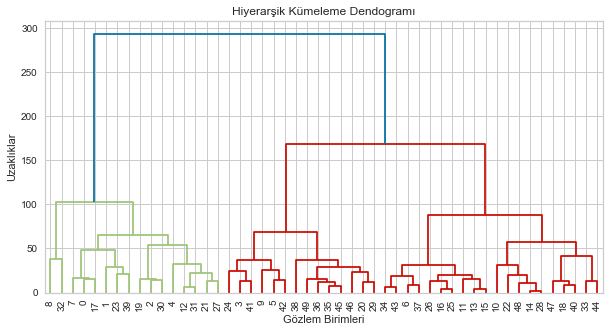

In [125]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size = 10);

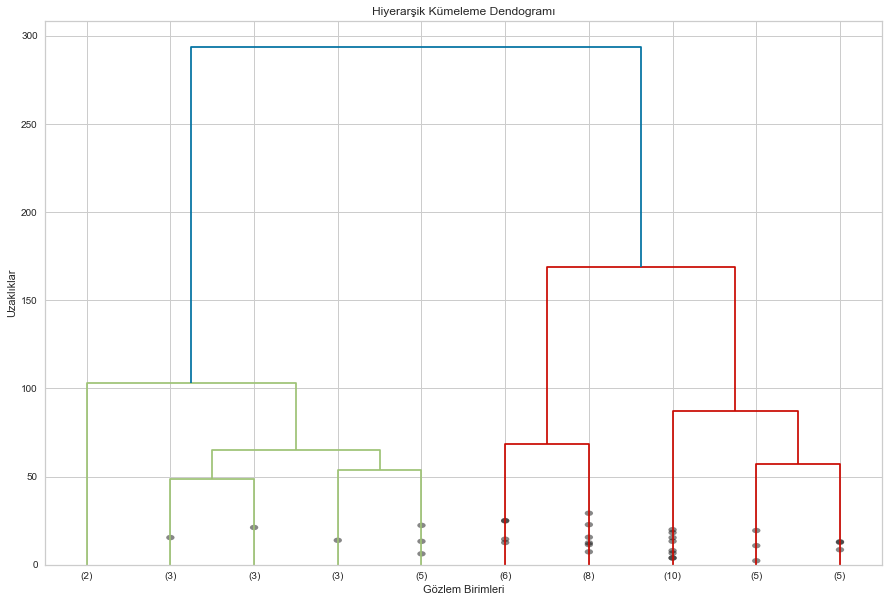

In [60]:
plt.figure(figsize = (15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10);

# Temel Bileşen Analizi

In [128]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [129]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.00
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.00
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.00
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.50
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.00


In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
df = StandardScaler().fit_transform(df)

In [133]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [134]:
from sklearn.decomposition import PCA

In [144]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [136]:
pca_fit

array([[ 7.68482432e-02,  1.65352465e+00],
       [ 3.37126792e-01, -2.32055981e+00],
       [ 3.40836188e+00,  7.55756506e-01],
       [-2.64222127e+00, -3.61486414e-01],
       [ 1.07168072e+00, -1.51167360e+00],
       [-4.14334694e+00,  1.52761501e+00],
       [-3.66187880e+00,  7.26482752e-01],
       [-3.46358326e+00, -1.11932250e-01],
       [ 3.95881864e+00,  2.16536132e+00],
       [ 2.97619746e+00, -2.18509076e+00],
       [-2.00435156e+00,  1.62310751e+00],
       [-8.22584224e-01, -5.87547914e-01],
       [-2.24564747e+00,  1.81903669e+00],
       [-1.12980749e+00,  2.57831292e+00],
       [ 5.74490571e+00,  2.22535369e-01],
       [-3.74756191e+00,  1.33933904e+00],
       [-3.28875794e+00,  2.29328755e+00],
       [-1.85723415e+00, -1.43268195e+00],
       [-2.29170256e+00, -9.25891185e-01],
       [ 2.54702025e-01, -1.12943118e+00],
       [ 5.83585565e+00, -2.23890882e-01],
       [ 7.95632970e-01, -1.52534619e+00],
       [-1.83824827e+00,  1.52283175e+00],
       [ 1.

In [137]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])

In [140]:
df.shape

(263, 17)

In [139]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen
0,0.08,1.65
1,0.34,-2.32
2,3.41,0.76
3,-2.64,-0.36
4,1.07,-1.51


In [143]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 , 0.0539344 , 0.04161435,
       0.03081193, 0.02869339, 0.01475891, 0.01063797, 0.00778969])

In [149]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

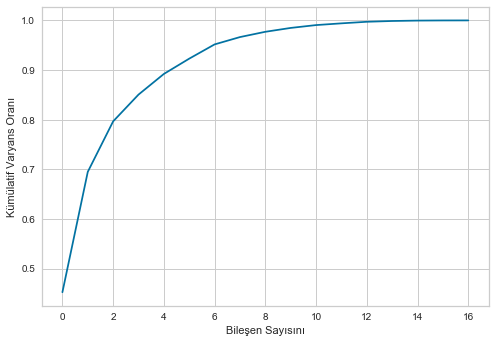

In [150]:
#optimum bilese sayisi

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı");

In [113]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [151]:
#final
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [152]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])

In [ ]:
Normal denklemler metodu

betalar bi
ağırlıklar wi


Rf
Knn
Overfitting
Train test 
Accuracy 
loss cost RMSE MSE MAE 
#False Negatif

Veri yapıları
#Neden numpy neden liste değil?
One hot encoding
Fonksiyon method farkı

Activation function
